<a href="https://colab.research.google.com/github/sun0809/CodeDeployGitHubDemo/blob/main/Action_Detection_10_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#################### <br>
10/4일 필요한 작업 <br>
-> 1. 어떤 수화를 넣을 건지 리스트 작성, 수화 공부하기 <br>
-> 2. 수화 데이터 쌓을 때, 모션인식 제대로 하지 않으면 데이터 학습 시 오류 발생 -> 빈 배경에서 실행, 상반신 어느정도로 나와야 하나 테스트 <br>
-> 3. 데이터 쌓은 후 -> 모델 정확도 개선 <br>
######################



# 필요한 라이브러리 설치 및 import 
1. Import and Install Dependencies

In [ ]:
#GPU를 사용하는 tensorflow와 mediapipe 설치 

# mediapipe란 ? 주로 멀티 모달 오디오, 비디오 또는 모든 시계열 데이터를 구축하는 데 사용되는 프레임 워크입니다.

#using tensorflow with GPU, mediapipe detacting movements
#!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# MP Holistic을 사용하여 pose, face, righthand, lefthand에 대한 <br>key point 생성하기 
2. Keypoints using MP Holistic


In [ ]:
mp_holistic = mp.solutions.holistic 
#mp.solutions.holistic 이란 ? -> 실시간 모션인식 (얼굴,몸의 분절을 실시간으로 추적한다.)

#Live perception of simultaneous human pose, face landmarks, 
#and hand tracking in real-time on mobile devices can enable various modern life applications
#https://google.github.io/mediapipe/solutions/holistic.html



mp_drawing = mp.solutions.drawing_utils # Drawing utilities
# 점을 연결하여 선을 보여준다.

In [ ]:
# 이미지를 추적하는 함수 만들기 
#이미지 -> RGB형식으로 만들어 모델에 대입한 결과를 results에 담고, 원상태로 만든 이미지와 results를 출력한다. 

def mediapipe_detection(image, model):   # 대상을 추적한다. 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction 모델에 대입 
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [ ]:
# 동영상에 점 찍기 

def draw_landmarks(image, results):  # 동영상의 frame과 동영상에서 받은 result를 받는다. 
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # 얼굴의 점을 연결하여 그린다.
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # POSE를 연결햐여 그린다.
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # 왼손 그리기
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # 오른손 그리기 

In [ ]:
# 더 정확한 판단을 위해 각각의 노드에 두개의 점을 추가한다. 
#add aditional 2 spots to the image

def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),  
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [ ]:
########x#################
#안해도됨 
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():  # cap이 켜져있을 동안 

        # Read feed
        ret, frame = cap.read()  #화면을 읽어서 ret과 frame 에 넣는다 

        # Make detections
        image, results = mediapipe_detection(frame, holistic)  # frame에 있는 점들을 추적하여 result에 넣는다. 
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)  # 이미지와 result에 landmark를 찍는다

        # Show to screen
        cv2.imshow('OpenCV Feed', image) 

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):  #q를 누르면 끝난다. 
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# 3. Keypoint 값을 넘파이 형태로 추출하기 
3. Extract Keypoint Values

results.pose_landmarks.landmark -> [res.x, res.y, res.z, res.visibility]으로 구성 <br>
그외는 <br>
results.face_landmarks.landmark -> [res.x, res.y, res.z]으로 구성 


In [ ]:
##위의 코드를 간단하게 하고 pose, face, lh,rh로 된 각각의  numpy 배열로 만들기 
# 넘파이배열 -> flatten 하기 
# 입력된 값이 없다면 0으로 채우기 (x,y,z 세개만큼, x3해준다.)

# if there's data in landmark, make them into numpy array. else fill with 0
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
## 위에서 만든 코드를 함수로 만들기 

# pose, face, lh, rh의 순서로 저장한다. 
# np.concatenate 를 하여 넘파이 배열을 하나로 합친다. 

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

#extract_keypoints(results).shape 
# (1662,) -> 468*3 + 33*4 + 21*3 + 21*3 

# 데이터 축적하기 
4. Setup Folders for Collection


In [ ]:
#폴더 만들기 
#make a folder
import os
os.mkdir('MP_Data')

In [ ]:
# 수화 단어 하나에 대한 폴더 만들기 
# make folder for each action in MP_Data 
import os
for i in ['hello', 'thanks', 'iloveyou']:
    a = 'MP_Data//'+i
    os.mkdir(a)

In [ ]:
# 하나의 동작 당 sequence를 담는 하위 폴더 생성 
#make folders contain each sequence data for each action (30 sequences)
for i in ['hello', 'thanks', 'iloveyou']:
    a = 'MP_Data//'+i
    for k in range(0,30):
        b = a+'//'+str(k)
        os.mkdir(b)

    

In [ ]:
#경로설정 
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# 추적할 action들 
# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

#하나의 동작 당 실행 할 횟수
# Thirty videos worth of data
no_sequences = 30

#하나의 동영상 당 담을 frame 수 (30 frame)
# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

# 5. 데이터 쌓기 
5. Collect Keypoint Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    # 추적하고자 하는 행동의 개수만큼 반복 
    for action in actions:
        # Loop through sequences aka videos
        #frame의 개수만큼 반복 
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                # 이전에 만들어 둔 이미지를 추적하는 함수를 사용하여 이미지를 추적한다. 
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                # 랜드마크를 그린다. (pose, face, left_hand, right_hand)
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    # 언제 시작인지 알려준다. 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    
                    #어디다가 저장하는 몇번째 sequence인지 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                # 필요한 data 추출한다. 
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                # loop가 다 돌면 q를 누르고 종료한다. 
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
# 동영상 창을 끌 때 실행, 아니면 오류남 
# when you want to close the camara 

cap.release()
cv2.destroyAllWindows()

# 6. 데이터 라벨링하기 
6. Preprocess Data and Create Labels and Features

In [ ]:
# 다른 액션에 대한 레이블 만들기 
# 필요한 데이터 임포트
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
# 정답데이터 라벨링 하기 
label_map = {label:num for num, label in enumerate(actions)} # enumerate-> 0 부터 순서대로 나타내 주는 것 

In [ ]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [ ]:
# 파일 불러와서 해당 영상에 대한 정답 데이터 labels에 담기 
# labeling actions to labels 

sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            # 데이터 파이썬 파일로 불러오기 
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            # 리스트에 append 하기 
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [ ]:
np.array(sequences).shape
# 총 90개의 비디오, 1편 당 30시퀀스 /  # (1662,)키포인트 -> 468*3 + 33*4 + 21*3 + 21*3 각(xyz 즉 세개씩 곱한다.)


(90, 30, 1662)

In [ ]:
np.array(labels).shape  #(90,) 라벨링한 정답 데이터 

(90,)

In [ ]:
X = np.array(sequences)

In [ ]:
X.shape
#90 channels, 30 frames, 1662 keypoints (68*3 + 33*4 + 21*3 + 21*3)

(90, 30, 1662)

In [ ]:
# 원핫인코딩 하기 
# one hot encoding 
y = to_categorical(labels).astype(int)

In [ ]:
# 데이터 나누기
# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05) # 5%가 테스트 되겠다

In [ ]:
y_test.shape

(5, 3)

# LSTM Neural Network 만들기 

Build and Train LSTM Neural Network

In [ ]:
# 모델 임포트 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense  #LSTM layer 를  쓰겠다.  
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
# set call back ( prevent over fitting )
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
# 이 타입 쓰는 이유 CNN 과 비교 시 장점 
# 미디아 type + LSTM 레이어
# 1. Less DaTa Required 
# 2. Faster To train
# 3. Faster Detections 

In [ ]:
model = Sequential()  # 시작 
# 30, 1662) 각각의 비디오 30 시퀀스 1662 키포인트
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662))) #64 유닛 -> LSTM은 다음 레이어에 sequences가 필요해서 다음 레이어가 있으면 True를 해준다
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))# 다음은 dense슬라이드라 sequences 필요없어
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax')) # ctions.shape[0] -> 3네트워크 유닛 

In [ ]:
# 아담 그레이드 , 비아너리 -> 바이너리 크로스 / 이건 분류하는 거-> multi class categoty  예측하는 확률을 보여준다. 
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 4s 310ms/step - loss: 5.3674 - categorical_accuracy: 0.3249
Epoch 2/2000
3/3 [==============================] - 0s 75ms/step - loss: 31.2909 - categorical_accuracy: 0.2466
Epoch 3/2000
3/3 [==============================] - 0s 74ms/step - loss: 47.4189 - categorical_accuracy: 0.2642
Epoch 4/2000
3/3 [==============================] - 0s 73ms/step - loss: 25.0417 - categorical_accuracy: 0.2681
Epoch 5/2000
3/3 [==============================] - 0s 71ms/step - loss: 19.2260 - categorical_accuracy: 0.3581
Epoch 6/2000
3/3 [==============================] - 0s 72ms/step - loss: 11.5346 - categorical_accuracy: 0.3777
Epoch 7/2000
3/3 [==============================] - 0s 74ms/step - loss: 15.9282 - categorical_accuracy: 0.4579
Epoch 8/2000
3/3 [==============================] - 0s 73ms/step - loss: 46.8404 - categorical_accuracy: 0.4364
Epoch 9/2000
3/3 [==============================] - 0s 71ms/step - loss: 92.6131 - categorical_accuracy:

3/3 [==============================] - 0s 74ms/step - loss: 4.2960 - categorical_accuracy: 0.4227
Epoch 146/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.8325 - categorical_accuracy: 0.4951
Epoch 147/2000
3/3 [==============================] - 0s 126ms/step - loss: 2.0571 - categorical_accuracy: 0.5968
Epoch 148/2000
3/3 [==============================] - 0s 72ms/step - loss: 5.5448 - categorical_accuracy: 0.3699
Epoch 149/2000
3/3 [==============================] - 0s 69ms/step - loss: 5.5158 - categorical_accuracy: 0.4540
Epoch 150/2000
3/3 [==============================] - 0s 81ms/step - loss: 3.8433 - categorical_accuracy: 0.4501
Epoch 151/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.9325 - categorical_accuracy: 0.4716
Epoch 152/2000
3/3 [==============================] - 0s 78ms/step - loss: 2.4649 - categorical_accuracy: 0.4774
Epoch 153/2000
3/3 [==============================] - 0s 69ms/step - loss: 3.9927 - categorical_accuracy: 0.37

3/3 [==============================] - 0s 62ms/step - loss: 6.3000 - categorical_accuracy: 0.4188
Epoch 290/2000
3/3 [==============================] - 0s 57ms/step - loss: 3.4949 - categorical_accuracy: 0.5322
Epoch 291/2000
3/3 [==============================] - 0s 58ms/step - loss: 3.1834 - categorical_accuracy: 0.4853
Epoch 292/2000
3/3 [==============================] - 0s 59ms/step - loss: 4.3146 - categorical_accuracy: 0.3854
Epoch 293/2000
3/3 [==============================] - 0s 59ms/step - loss: 3.2983 - categorical_accuracy: 0.4345
Epoch 294/2000
3/3 [==============================] - 0s 57ms/step - loss: 3.7086 - categorical_accuracy: 0.4579
Epoch 295/2000
3/3 [==============================] - 0s 59ms/step - loss: 3.4995 - categorical_accuracy: 0.5499
Epoch 296/2000
3/3 [==============================] - 0s 58ms/step - loss: 3.7108 - categorical_accuracy: 0.4207
Epoch 297/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.1195 - categorical_accuracy: 0.456

3/3 [==============================] - 0s 57ms/step - loss: 3.6211 - categorical_accuracy: 0.2994
Epoch 434/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.5025 - categorical_accuracy: 0.4657
Epoch 435/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.1267 - categorical_accuracy: 0.5518
Epoch 436/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.0698 - categorical_accuracy: 0.4227
Epoch 437/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.2432 - categorical_accuracy: 0.5264
Epoch 438/2000
3/3 [==============================] - 0s 57ms/step - loss: 4.9233 - categorical_accuracy: 0.3053
Epoch 439/2000
3/3 [==============================] - 0s 58ms/step - loss: 5.3724 - categorical_accuracy: 0.5577
Epoch 440/2000
3/3 [==============================] - 0s 58ms/step - loss: 3.8638 - categorical_accuracy: 0.3601
Epoch 441/2000
3/3 [==============================] - 0s 65ms/step - loss: 8.9501 - categorical_accuracy: 0.389

3/3 [==============================] - 0s 59ms/step - loss: 0.7693 - categorical_accuracy: 0.7593
Epoch 578/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.7838 - categorical_accuracy: 0.6693
Epoch 579/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.7013 - categorical_accuracy: 0.6966
Epoch 580/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.6276 - categorical_accuracy: 0.7808
Epoch 581/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.7133 - categorical_accuracy: 0.7456
Epoch 582/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.7475 - categorical_accuracy: 0.7573
Epoch 583/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0147 - categorical_accuracy: 0.5909
Epoch 584/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.7186 - categorical_accuracy: 0.6849
Epoch 585/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.9362 - categorical_accuracy: 0.745

3/3 [==============================] - 0s 58ms/step - loss: 1.0496 - categorical_accuracy: 0.7045
Epoch 722/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.9088 - categorical_accuracy: 0.7123
Epoch 723/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.8483 - categorical_accuracy: 0.7398
Epoch 724/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.6838 - categorical_accuracy: 0.5833
Epoch 725/2000
3/3 [==============================] - 0s 58ms/step - loss: 3.9135 - categorical_accuracy: 0.6164
Epoch 726/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.6394 - categorical_accuracy: 0.5518
Epoch 727/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.8354 - categorical_accuracy: 0.6575
Epoch 728/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.0707 - categorical_accuracy: 0.5596
Epoch 729/2000
3/3 [==============================] - 0s 56ms/step - loss: 2.1961 - categorical_accuracy: 0.638

3/3 [==============================] - 0s 59ms/step - loss: 2.0127 - categorical_accuracy: 0.5656
Epoch 866/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.4332 - categorical_accuracy: 0.5851
Epoch 867/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.3510 - categorical_accuracy: 0.6282
Epoch 868/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0333 - categorical_accuracy: 0.7163
Epoch 869/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.9402 - categorical_accuracy: 0.6457
Epoch 870/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.7859 - categorical_accuracy: 0.6712
Epoch 871/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0297 - categorical_accuracy: 0.6909
Epoch 872/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0228 - categorical_accuracy: 0.5891
Epoch 873/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0577 - categorical_accuracy: 0.684

3/3 [==============================] - 0s 60ms/step - loss: 0.8823 - categorical_accuracy: 0.6419
Epoch 1010/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0754 - categorical_accuracy: 0.6830
Epoch 1011/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.8635 - categorical_accuracy: 0.7436
Epoch 1012/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.4224 - categorical_accuracy: 0.6379
Epoch 1013/2000
3/3 [==============================] - 0s 59ms/step - loss: 3.3904 - categorical_accuracy: 0.6184
Epoch 1014/2000
3/3 [==============================] - 0s 61ms/step - loss: 2.1226 - categorical_accuracy: 0.5813
Epoch 1015/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.3592 - categorical_accuracy: 0.6165
Epoch 1016/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0478 - categorical_accuracy: 0.7338
Epoch 1017/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.7437 - categorical_accurac

3/3 [==============================] - 0s 60ms/step - loss: 0.9808 - categorical_accuracy: 0.7476
Epoch 1082/2000
3/3 [==============================] - 0s 61ms/step - loss: 2.6040 - categorical_accuracy: 0.7456
Epoch 1083/2000
3/3 [==============================] - 0s 59ms/step - loss: 8.5765 - categorical_accuracy: 0.4580
Epoch 1084/2000
3/3 [==============================] - 0s 60ms/step - loss: 8.7215 - categorical_accuracy: 0.4971
Epoch 1085/2000
3/3 [==============================] - 0s 62ms/step - loss: 6.4265 - categorical_accuracy: 0.3954
Epoch 1086/2000
3/3 [==============================] - 0s 57ms/step - loss: 7.6208 - categorical_accuracy: 0.3150
Epoch 1087/2000
3/3 [==============================] - 0s 61ms/step - loss: 14.2391 - categorical_accuracy: 0.3405
Epoch 1088/2000
3/3 [==============================] - 0s 59ms/step - loss: 22.9099 - categorical_accuracy: 0.3620
Epoch 1089/2000
3/3 [==============================] - 0s 61ms/step - loss: 6.9821 - categorical_accur

Epoch 1153/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.9660 - categorical_accuracy: 0.5871
Epoch 1154/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.9936 - categorical_accuracy: 0.6399
Epoch 1155/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.8990 - categorical_accuracy: 0.6204
Epoch 1156/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0256 - categorical_accuracy: 0.5558
Epoch 1157/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.8422 - categorical_accuracy: 0.5558
Epoch 1158/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.7825 - categorical_accuracy: 0.6926
Epoch 1159/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.1069 - categorical_accuracy: 0.4776
Epoch 1160/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.8450 - categorical_accuracy: 0.5968
Epoch 1161/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.7581 - cat

3/3 [==============================] - 0s 60ms/step - loss: 0.7997 - categorical_accuracy: 0.7026
Epoch 1297/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.7140 - categorical_accuracy: 0.8023
Epoch 1298/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.6747 - categorical_accuracy: 0.7281
Epoch 1299/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.8199 - categorical_accuracy: 0.6615
Epoch 1300/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.5531 - categorical_accuracy: 0.7631
Epoch 1301/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.8826 - categorical_accuracy: 0.7279
Epoch 1302/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1158 - categorical_accuracy: 0.7123
Epoch 1303/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.6107 - categorical_accuracy: 0.6713
Epoch 1304/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4507 - categorical_accurac

3/3 [==============================] - 0s 60ms/step - loss: 0.3047 - categorical_accuracy: 0.8610
Epoch 1369/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.3874 - categorical_accuracy: 0.8180
Epoch 1370/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.3864 - categorical_accuracy: 0.8532
Epoch 1371/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.4664 - categorical_accuracy: 0.8455
Epoch 1372/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.2643 - categorical_accuracy: 0.8864
Epoch 1373/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.3095 - categorical_accuracy: 0.8748
Epoch 1374/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.2911 - categorical_accuracy: 0.9177
Epoch 1375/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.3509 - categorical_accuracy: 0.8903
Epoch 1376/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.3820 - categorical_accurac

3/3 [==============================] - 0s 64ms/step - loss: 0.5106 - categorical_accuracy: 0.8318
Epoch 1441/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.4190 - categorical_accuracy: 0.7926
Epoch 1442/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.4441 - categorical_accuracy: 0.7965
Epoch 1443/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.4068 - categorical_accuracy: 0.8571
Epoch 1444/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.5395 - categorical_accuracy: 0.8081
Epoch 1445/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0730 - categorical_accuracy: 0.7495
Epoch 1446/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.6652 - categorical_accuracy: 0.7261
Epoch 1447/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.7773 - categorical_accuracy: 0.7554
Epoch 1448/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.6616 - categorical_accurac

3/3 [==============================] - 0s 60ms/step - loss: 0.2929 - categorical_accuracy: 0.8689
Epoch 1513/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.3644 - categorical_accuracy: 0.8317
Epoch 1514/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.2930 - categorical_accuracy: 0.9100
Epoch 1515/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.4568 - categorical_accuracy: 0.8141
Epoch 1516/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.2708 - categorical_accuracy: 0.9100
Epoch 1517/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.2832 - categorical_accuracy: 0.8807
Epoch 1518/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.3124 - categorical_accuracy: 0.8532
Epoch 1519/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.2803 - categorical_accuracy: 0.8982
Epoch 1520/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4951 - categorical_accurac

3/3 [==============================] - 0s 60ms/step - loss: 0.2791 - categorical_accuracy: 0.8552
Epoch 1585/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.3323 - categorical_accuracy: 0.9001
Epoch 1586/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.5595 - categorical_accuracy: 0.8356
Epoch 1587/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.7273 - categorical_accuracy: 0.6400
Epoch 1588/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.3083 - categorical_accuracy: 0.6772
Epoch 1589/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.6189 - categorical_accuracy: 0.7886
Epoch 1590/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.6482 - categorical_accuracy: 0.7729
Epoch 1591/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.7005 - categorical_accuracy: 0.7867
Epoch 1592/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.7853 - categorical_accurac

3/3 [==============================] - 0s 58ms/step - loss: 0.6185 - categorical_accuracy: 0.7652
Epoch 1657/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.5294 - categorical_accuracy: 0.8180
Epoch 1658/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.4400 - categorical_accuracy: 0.8355
Epoch 1659/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4477 - categorical_accuracy: 0.8708
Epoch 1660/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.3840 - categorical_accuracy: 0.8415
Epoch 1661/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.2400 - categorical_accuracy: 0.9119
Epoch 1662/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.2767 - categorical_accuracy: 0.8943
Epoch 1663/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.3502 - categorical_accuracy: 0.9021
Epoch 1664/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.2601 - categorical_accurac

3/3 [==============================] - 0s 61ms/step - loss: 0.1082 - categorical_accuracy: 0.9530
Epoch 1729/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.0993 - categorical_accuracy: 0.9843
Epoch 1730/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.0821 - categorical_accuracy: 0.9882
Epoch 1731/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.0886 - categorical_accuracy: 0.9784
Epoch 1732/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.1222 - categorical_accuracy: 0.9648
Epoch 1733/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.1023 - categorical_accuracy: 0.9491
Epoch 1734/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.2337 - categorical_accuracy: 0.9198
Epoch 1735/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.4423 - categorical_accuracy: 0.8454
Epoch 1736/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.2933 - categorical_accurac

3/3 [==============================] - 0s 60ms/step - loss: 0.9774 - categorical_accuracy: 0.7495
Epoch 1801/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0031 - categorical_accuracy: 0.7653
Epoch 1802/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.6529 - categorical_accuracy: 0.7340
Epoch 1803/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.4388 - categorical_accuracy: 0.8591
Epoch 1804/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.5196 - categorical_accuracy: 0.8395
Epoch 1805/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.7038 - categorical_accuracy: 0.7691
Epoch 1806/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.8956 - categorical_accuracy: 0.7222
Epoch 1807/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0703 - categorical_accuracy: 0.7886
Epoch 1808/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.2200 - categorical_accurac

3/3 [==============================] - 0s 84ms/step - loss: 0.1373 - categorical_accuracy: 0.9648
Epoch 1873/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.1558 - categorical_accuracy: 0.9452
Epoch 1874/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1446 - categorical_accuracy: 0.9491
Epoch 1875/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.1601 - categorical_accuracy: 0.9511
Epoch 1876/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.1785 - categorical_accuracy: 0.9472
Epoch 1877/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1435 - categorical_accuracy: 0.9491
Epoch 1878/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.2076 - categorical_accuracy: 0.9296
Epoch 1879/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0983 - categorical_accuracy: 0.9745
Epoch 1880/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.1243 - categorical_accurac

3/3 [==============================] - 0s 59ms/step - loss: 0.0947 - categorical_accuracy: 0.9824
Epoch 1945/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.0845 - categorical_accuracy: 0.9726
Epoch 1946/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.0427 - categorical_accuracy: 0.9941
Epoch 1947/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.0587 - categorical_accuracy: 0.9726
Epoch 1948/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.0504 - categorical_accuracy: 0.9843
Epoch 1949/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.0646 - categorical_accuracy: 0.9824
Epoch 1950/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.0540 - categorical_accuracy: 0.9843
Epoch 1951/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.0576 - categorical_accuracy: 0.9902
Epoch 1952/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.0768 - categorical_accurac

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

 -  결과보기 
 - visualize the result of model



 cmd 창을 킨다 <br>
open cmd  <br>
<br>
C:\Users\User>cd Logs <br>
<br>
C:\Users\User\Logs>cd Train<br>
<br>
C:\Users\User\Logs\train>dir<br>

- 파일을 텐서플로우로 실행시킨다. (run the file )
C:\Users\User\Logs\train>tensorboard --logdir=. 

- 링크를 복사하여 크롬창에 띄운다 ( copy the like and open it at Chrome)

# 예측하기 
8. Make Predictions

In [ ]:
res = model.predict(X_test)

In [ ]:
actions[np.argmax(res[4])]

'thanks'

In [ ]:
actions[np.argmax(y_test[4])]

'iloveyou'

# 모델 저장 
9. Save Weights

In [ ]:
model.save('action.h5')

In [ ]:
model.load_weights('action.h5')

# 모델 평가 
10. Evaluation using Confusion Matrix and Accuracy

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_train)

In [ ]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)
# 이원교차표 출력 

array([[[55,  1],
        [ 4, 25]],

       [[53,  3],
        [ 1, 28]],

       [[56,  2],
        [ 1, 26]]], dtype=int64)

In [ ]:
accuracy_score(ytrue, yhat)

0.8

# 실시간 예측하기 
11. Test in Real Time

In [ ]:
from scipy import stats

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

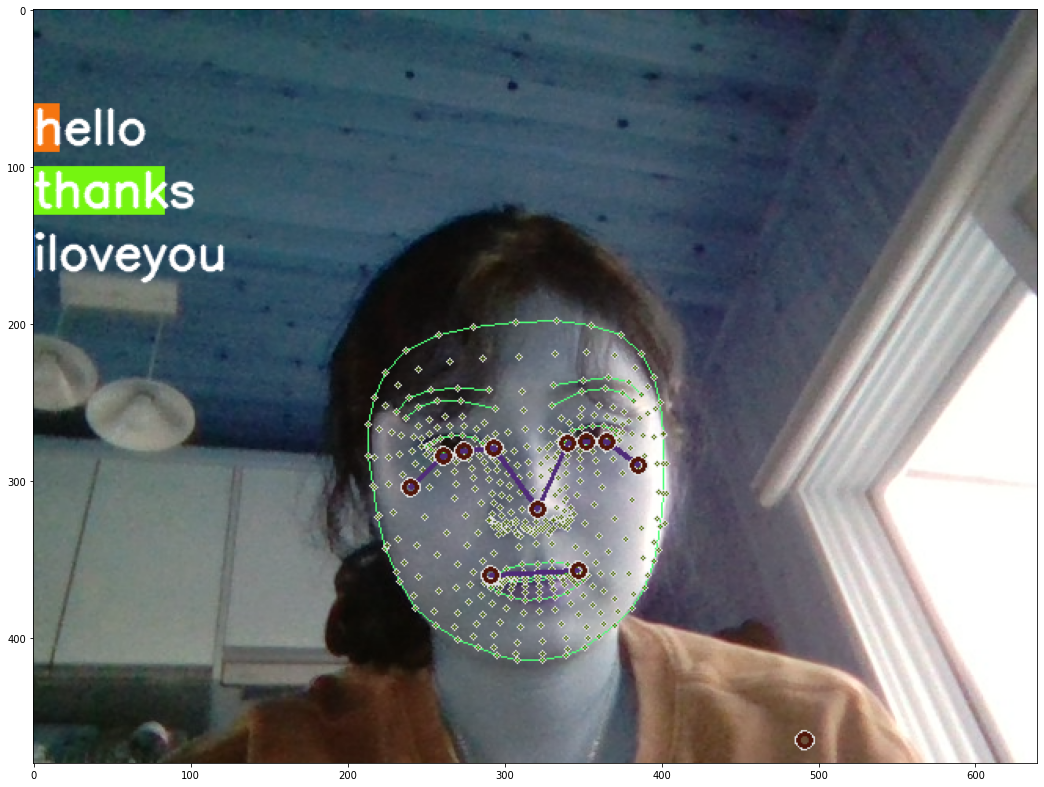

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
# 1. New detection variables #30개 차면 detect 할 수 있게
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:] #마지막 30프레임
        
        if len(sequence) == 30: #30개차면 predict한다 
            res = model.predict(np.expand_dims(sequence, axis=0))[0] # 2차원을 3차원으로 늘려준다. [0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution

thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python

In [ ]:
cap.release()
cv2.destroyAllWindows()